In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("8H.csv")
dataset = dataset.iloc[11:, :]*10**5 - 121325
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[-17705. -18035. -18375. ... -10034.  -9929. -10041.]
[-18025. -18395. -18445. ...  -9929. -10041. -10079.]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

In [3]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

39055.0
-39055.0


# Find high value by open value

In [4]:
x = dataset.iloc[:, 1:35].values
y = dataset.iloc[:,   35].values
y = y.reshape(len(y),1)
print(x)
print(y)

[[-20595. -19425. -20595. ... -17175. -18055. -17705.]
 [-19785. -19655. -20785. ... -17645. -18605. -18035.]
 [-20555. -18545. -20625. ... -18005. -18445. -18375.]
 ...
 [ -9055.  -8837.  -9116. ...  -9439. -10140. -10034.]
 [ -8969.  -8864.  -9292. ...  -9908. -10091.  -9929.]
 [ -9011.  -8761.  -9017. ...  -9876. -10152. -10041.]]
[[-17645.]
 [-18005.]
 [-18095.]
 ...
 [ -9908.]
 [ -9876.]
 [ -9944.]]


In [5]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [6]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[-17295.89 -17645.  ]
 [-17929.86 -18005.  ]
 [-17929.86 -18095.  ]
 ...
 [ -9785.2   -9908.  ]
 [ -9752.89  -9876.  ]
 [ -9787.73  -9944.  ]]


In [7]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998424042334929

In [8]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

2152.3837890625
146.6399033915109


# Find next low

In [9]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18055.   -17705.   -17295.89]
 [-19785.   -19655.   -20785.   ... -18605.   -18035.   -17929.86]
 [-20555.   -18545.   -20625.   ... -18445.   -18375.   -17929.86]
 ...
 [ -9055.    -8837.    -9116.   ... -10140.   -10034.    -9785.2 ]
 [ -8969.    -8864.    -9292.   ... -10091.    -9929.    -9752.89]
 [ -9011.    -8761.    -9017.   ... -10152.   -10041.    -9787.73]]


In [10]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18605.]
 [-18445.]
 [-18725.]
 ...
 [-10091.]
 [-10152.]
 [-10245.]]


In [11]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[-18200.64 -18605.  ]
 [-18239.07 -18445.  ]
 [-18895.67 -18725.  ]
 ...
 [-10186.26 -10091.  ]
 [-10051.11 -10152.  ]
 [-10227.83 -10245.  ]]


In [13]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998477347499257

In [14]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

2074.26171875
143.8519418311004


# Find close

In [15]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -17705.   -17295.89 -18200.64]
 [-19785.   -19655.   -20785.   ... -18035.   -17929.86 -18239.07]
 [-20555.   -18545.   -20625.   ... -18375.   -17929.86 -18895.67]
 ...
 [ -9055.    -8837.    -9116.   ... -10034.    -9785.2  -10186.26]
 [ -8969.    -8864.    -9292.   ...  -9929.    -9752.89 -10051.11]
 [ -9011.    -8761.    -9017.   ... -10041.    -9787.73 -10227.83]]


In [16]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18025.]
 [-18395.]
 [-18445.]
 ...
 [ -9929.]
 [-10041.]
 [-10079.]]


In [17]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [18]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[-17551.   -18025.  ]
 [-18121.42 -18395.  ]
 [-18588.66 -18445.  ]
 ...
 [ -9986.79  -9929.  ]
 [ -9914.7  -10041.  ]
 [ -9986.66 -10079.  ]]


In [19]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997785477556221

In [20]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

2281.6513671875
174.84497122765626


# Checking ascending

In [21]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -17705.   -17295.89 -18200.64]
 [-19785.   -19655.   -20785.   ... -18035.   -17929.86 -18239.07]
 [-20555.   -18545.   -20625.   ... -18375.   -17929.86 -18895.67]
 ...
 [ -9055.    -8837.    -9116.   ... -10034.    -9785.2  -10186.26]
 [ -8969.    -8864.    -9292.   ...  -9929.    -9752.89 -10051.11]
 [ -9011.    -8761.    -9017.   ... -10041.    -9787.73 -10227.83]]


In [22]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[6664 2274]
 [ 982 8426]]


0.8225226207347651

In [24]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(18346,)
[[6676 2262]
 [2310 7098]]


0.7507903630219122

In [25]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [26]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0      349.111328  404.359375   474.000000
1       75.138672  205.933594   273.578125
2      165.138672  170.671875   143.656250
3      265.138672  178.769531   243.656250
4      345.138672  264.435547     6.343750
...           ...         ...          ...
18341  195.695312  187.083008   364.493164
18342  260.813477  470.622070   466.443359
18343  122.804687   95.260742    57.787109
18344  123.107422  100.894531   126.298828
18345  156.274414   17.169922    92.340820

[18346 rows x 3 columns]


In [29]:
x = []
for i in range(18346):
    x.append(i)

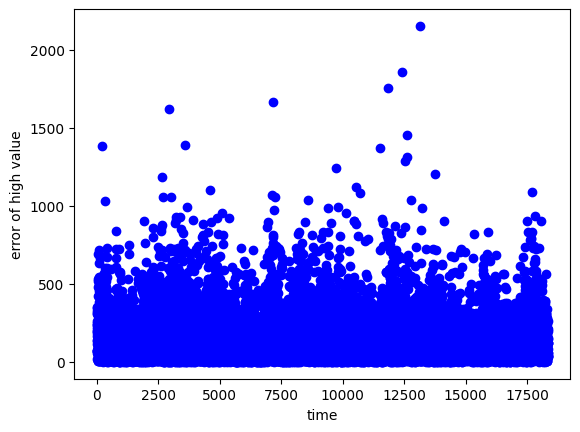

In [30]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [31]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

8122


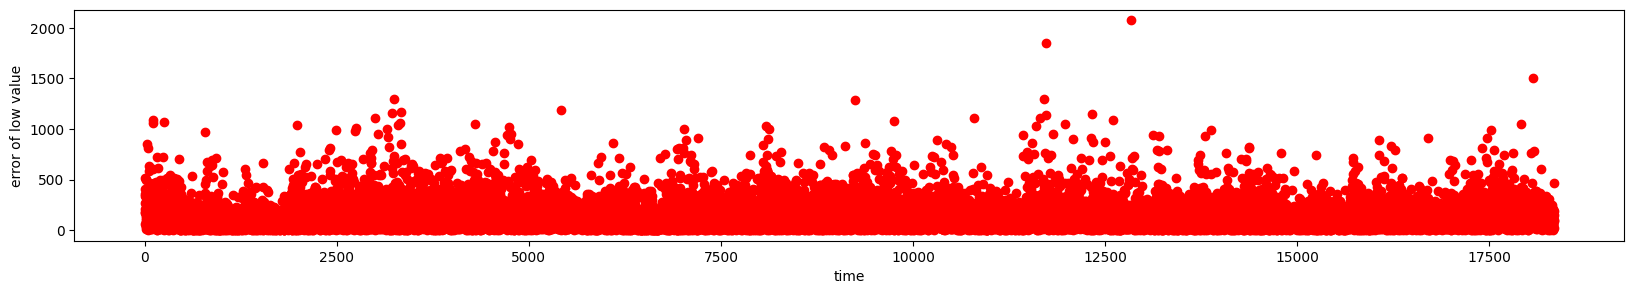

In [32]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [33]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

8174


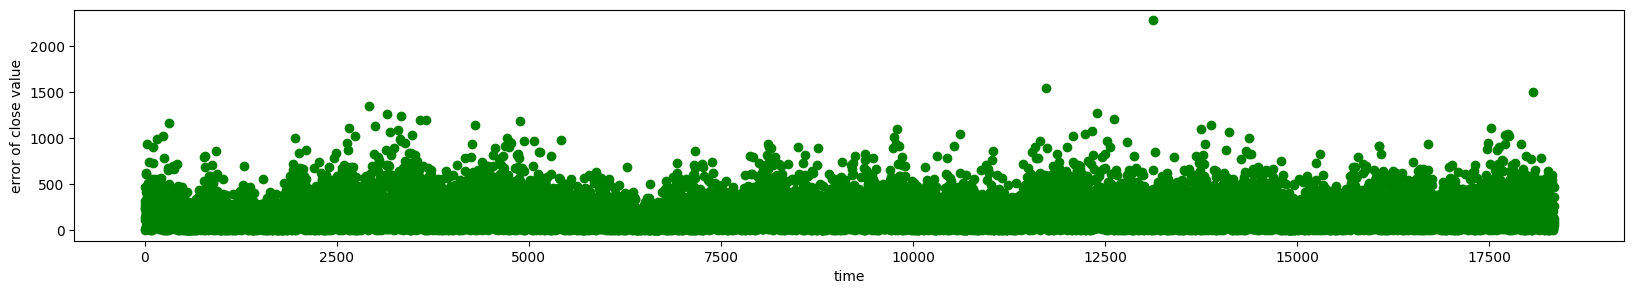

In [34]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [35]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

7333


In [36]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 44.2712307860024
percent of under 100 for low is 44.554671317998476
percent of under 100 for close is 39.970565790908104


In [37]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 75.7440313964897
percent of under 200 for low is 76.62160688978524
percent of under 200 for close is 67.27897089283768


In [38]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 62.48228496675024
percent of under 150 for low is 63.005559795050694
percent of under 150 for close is 55.189142047312764


In [39]:
dataset

,high error,low error,close error
0,349.111328,404.359375,474.000000
1,75.138672,205.933594,273.578125
2,165.138672,170.671875,143.656250
3,265.138672,178.769531,243.656250
4,345.138672,264.435547,6.343750
...,...,...,...
18341,195.695312,187.083008,364.493164
18342,260.813477,470.622070,466.443359
18343,122.804687,95.260742,57.787109
18344,123.107422,100.894531,126.298828
